# Accuracy of consensus reads

This notebook profile the base accuracy of consensus reads

In [1]:
import glob
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = defaultdict(list)
n = 0
for path in sorted(glob.glob("../../1_FLAIRseq/results/consensus/consensus_accuracy/20220719_K562R3/*/summary.tsv")):
    d = pd.read_csv(path, sep="\t", header=0, index_col=0)
    if len(d) >= 5000:
        n += 1
        for size, accuracy in d[["Size", "Accuracy"]].values:
            data[size].append(accuracy)
print(n)

58


Size	Number	QualityScore	Accuracy
1	468869	16.622606	0.978236
2	138477	19.845273	0.989637
3	75054	24.955443	0.996805
4	51421	27.626786	0.998273
5	38405	29.242793	0.99881
6	29901	29.722028	0.998934
7	24521	29.88559	0.998973
8	20607	30.094509	0.999022
9	17493	30.141003	0.999032
10	237008	30.523733	0.999114


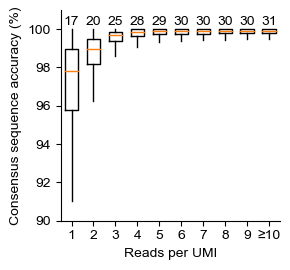

In [3]:
plt.figure(figsize=(3, 2.8))
xs = np.arange(1, 11)
xticks = list(map(str, xs))
xticks[-1] = "≥%s" % xticks[-1]
w = 0.6
print("Size\tNumber\tQualityScore\tAccuracy")
for x in xs:
    ys = np.array(data[x])
    v = np.median(ys)
    q = -10 * np.log10(1 - v)
    print(x, len(ys), round(q, 6), round(np.median(ys), 6), sep="\t")
    plt.boxplot([ys * 100], positions=[x], widths=w, showfliers=False, showcaps=False)
    plt.text(x, 100.2, str(round(q)), ha="center")
plt.xlabel("Reads per UMI")
plt.ylabel("Consensus sequence accuracy (%)")
plt.ylim(90, 101)
plt.xlim(0.5, 10.5)
plt.xticks(xs, xticks)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/consensus_accuracy.pdf")